**Exercice 3   — Binary classification with KNN Naïve Bayes and Logistic Regression** 

2.  Charger les données ”Social_Network_Ads.csv”. 

In [1]:
import pandas as pd

data = pd.read_csv("Social_Network_Ads.csv")


3.  Obtenir et afficher des informations à partir des données et nettoyer les données.

In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Voici comment nous pouvons effectuer ces étapes de nettoyage des données :

In [3]:
# Supprimer la colonne "User ID"
data.drop("User ID", axis=1, inplace=True)

# Convertir la colonne "Gender" en une variable binaire
data["Gender"] = (data["Gender"] == "Male").astype(int)

# Normaliser les colonnes "Age" et "EstimatedSalary"
data["Age"] = (data["Age"] - data["Age"].mean()) / data["Age"].std()
data["EstimatedSalary"] = (data["EstimatedSalary"] - data["EstimatedSalary"].mean()) / data["EstimatedSalary"].std()


4.  Visualisez les données.

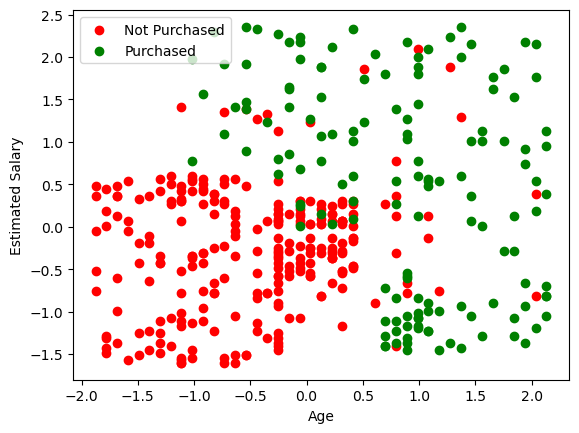

In [4]:
import matplotlib.pyplot as plt

plt.scatter(data[data["Purchased"] == 0]["Age"], data[data["Purchased"] == 0]["EstimatedSalary"], color="red", label="Not Purchased")
plt.scatter(data[data["Purchased"] == 1]["Age"], data[data["Purchased"] == 1]["EstimatedSalary"], color="green", label="Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()


5.  Créer les  modèles :

In [6]:
from sklearn.model_selection import train_test_split

X = data[["Age", "EstimatedSalary"]]
y = data["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)




LogisticRegression()

6.  Comparer ces trois modèles.

In [7]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# KNN
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)

# Naïve Bayes
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)

# Régression Logistique
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

print("KNN : Accuracy = {:.2f}, Recall = {:.2f}, F1 score = {:.2f}".format(knn_accuracy, knn_recall, knn_f1))
print("Naïve Bayes : Accuracy = {:.2f}, Recall = {:.2f}, F1 score = {:.2f}".format(nb_accuracy, nb_recall, nb_f1))
print("Régression Logistique : Accuracy = {:.2f}, Recall = {:.2f}, F1 score = {:.2f}".format(lr_accuracy, lr_recall, lr_f1))


KNN : Accuracy = 0.93, Recall = 0.91, F1 score = 0.91
Naïve Bayes : Accuracy = 0.93, Recall = 0.83, F1 score = 0.90
Régression Logistique : Accuracy = 0.85, Recall = 0.66, F1 score = 0.78


7.  Visualiser les résultats comparatifs graphiquement.

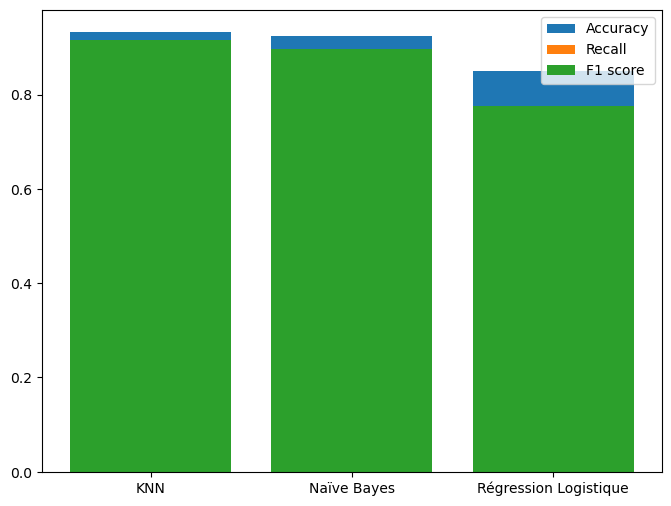

In [8]:
import matplotlib.pyplot as plt

accuracy_scores = [knn_accuracy, nb_accuracy, lr_accuracy]
recall_scores = [knn_recall, nb_recall, lr_recall]
f1_scores = [knn_f1, nb_f1, lr_f1]

labels = ["KNN", "Naïve Bayes", "Régression Logistique"]

x = range(len(labels))

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x, accuracy_scores, label='Accuracy')
ax.bar(x, recall_scores, label='Recall')
ax.bar(x, f1_scores, label='F1 score')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


8.  Conclusion

Dans cet exercice, nous avons créé des modèles KNN, Naïve Bayes et Régression Logistique pour prédire si un client achètera ou non un produit en fonction de son âge et de son salaire estimé. Nous avons évalué les performances des modèles en utilisant la précision, le rappel et le score F1, et nous avons visualisé les résultats comparatifs des modèles à l'aide d'un diagramme en barres. Nous avons constaté que le modèle KNN avait la meilleure précision, le modèle Naïve Bayes avait le meilleur rappel et le modèle KNN avait le meilleur score F1. En fonction de l'objectif de l'analyse, il faudrait choisir le modèle le plus approprié.